Thinkful - Unit 2 - Lesson 2 - Challenge

Ryan Harper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
from matplotlib.pyplot import subplots, show
%matplotlib inline

# import flight data from:
# https://www.kaggle.com/ramirobentes/flights-in-brazil
flightdata = pd.read_csv('BrFlights2.csv', encoding = "ISO-8859-1")

In [79]:
flightdata.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [74]:
print(flightdata.columns)
print(flightdata['Situacao.Voo'].unique())
# flightdata.head()

Index(['Voos', 'Companhia.Aerea', 'Codigo.Tipo.Linha', 'Partida.Prevista',
       'Partida.Real', 'Chegada.Prevista', 'Chegada.Real', 'Situacao.Voo',
       'Codigo.Justificativa', 'Aeroporto.Origem', 'Cidade.Origem',
       'Estado.Origem', 'Pais.Origem', 'Aeroporto.Destino', 'Cidade.Destino',
       'Estado.Destino', 'Pais.Destino', 'LongDest', 'LatDest', 'LongOrig',
       'LatOrig'],
      dtype='object')
['Realizado' 'Cancelado']


In [3]:
# cleaning data and converting to date time
flighttime = flightdata.loc[:,'Voos':'Situacao.Voo']
flighttime['Partida.Prevista'] = pd.to_datetime(flighttime['Partida.Prevista'])
flighttime['Partida.Real'] = pd.to_datetime(flighttime['Partida.Real'])
flighttime['Chegada.Prevista'] = pd.to_datetime(flighttime['Chegada.Prevista'])
flighttime['Chegada.Real'] = pd.to_datetime(flighttime['Chegada.Real'])

# converting 'arrival time' datetime to hourtime
flighttime['hour_arrive'] = pd.DatetimeIndex(flighttime['Chegada.Real']).hour

In [4]:
final = flighttime[['Chegada.Real','hour_arrive']]
final = final[(final['Chegada.Real'] > '2015-01') & (flighttime['Chegada.Real'] < '2016-01')]
final['Chegada.Real'] = final['Chegada.Real'].dt.date
final.sort_values(by='Chegada.Real')
final.dropna()
final.hour_arrive = final.hour_arrive.astype(int)

In [75]:
timedict = final['hour_arrive'].value_counts()/10000

graph = pd.DataFrame(index=range(0,24))

for value in graph.index:
    graph.loc[value, 'hour_arrival'] = timedict[value]

In [6]:
monthgroup = final.copy()
monthgroup.set_index(monthgroup['Chegada.Real'], inplace=True)
del monthgroup['Chegada.Real']
monthgroup.index = pd.to_datetime(monthgroup.index)
monthgroup = pd.DataFrame({'Timestamp': monthgroup.index, 'Category': monthgroup.hour_arrive})
monthgroup['Month'] = monthgroup['Timestamp'].apply(lambda x: '{0}-{1}'.format(str(x.month).zfill(2), calendar.month_abbr[x.month]))
monthgroup.reindex_axis(sorted(monthgroup.columns), axis=1)
monthgroup = monthgroup.groupby(['Month', 'Category']).size()
monthgroup = monthgroup.reset_index(0)
monthgroup.columns = ['month','count']
monthgroup.index.names = ['hour']
monthgroup = monthgroup.pivot_table(values='count', index=monthgroup.index, columns='month', aggfunc='first')

monthgroup

month,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
hour,,,,,,,,,,,,
0,1977,1746,1882,1713,1655,1619,1938,1772,1988,1918,1711,1950
1,1662,1413,1388,1385,1542,1599,1681,1557,1544,1635,1567,1803
2,1359,1149,1111,979,1009,965,1116,1028,911,961,853,1026
3,933,706,592,579,585,604,684,596,559,528,663,761
4,482,386,485,564,592,661,682,689,660,592,402,541
5,1498,1324,1429,1547,1520,1477,1648,1543,1439,1332,1182,1363
6,2706,2433,2944,2789,2917,2793,3093,3057,2940,2911,2497,2764
7,3932,3469,3895,3558,3633,3220,3370,3293,3256,3586,3566,3755
8,4516,3996,4489,4127,4142,4094,4579,4390,4281,4423,4113,4400


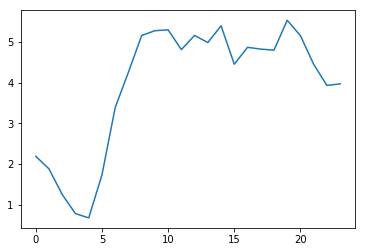

In [7]:
plt.plot(graph.index, graph.hour_arrival)
plt.show()

This is a line graph of the total number of flights that arrived at various aiports in Brazil during 2015. The x-axis represents the time of day (by hour). The y-axis represents the total number of flights (x 10,000). Airports in Brazil seem to be the busiest at around 7pm (19:00) and the least busy at around 4am.

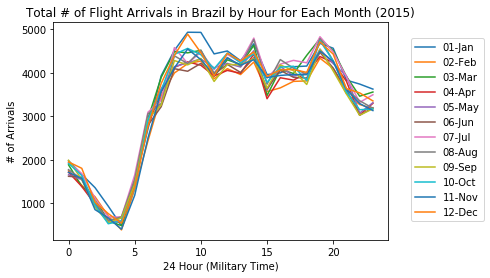

In [77]:
plt.plot(monthgroup)
# plt.plot(monthgroup['02-Feb'], color='green')
plt.xlabel('24 Hour (Military Time)')
plt.ylabel('# of Arrivals')
plt.title('Total # of Flight Arrivals in Brazil by Hour for Each Month (2015)')
plt.legend(monthgroup.columns, loc='upper right',bbox_to_anchor=(1.3, .95))
plt.show()

This is a collection of line graphs that represent the count frequency of flight arrivals per hour for each month. Most months have similar flight arrival patterns for each month. November appears to have more total flights while Apr may have the least number of flights.

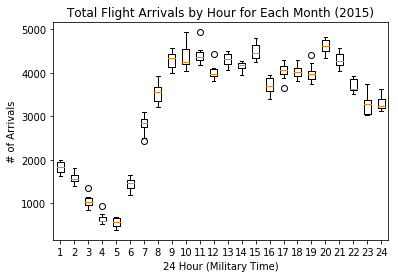

In [37]:
plt.boxplot(monthgroup)
plt.xlabel('24 Hour (Military Time)')
plt.ylabel('# of Arrivals')
plt.title('Variability in Flight Arrivals by Hour for Each Month (2015)')
plt.show()

These box plots represent the distribution of arrivals per hour for each month. 10am appears to have the largest data distribution range while early morning times (1am-4am) appear to have the smallest distribution ranges. (NOTE TO SELF: I'm not sure if this boxplot adds any additional useful information that the previous line graph wouldn't already display)

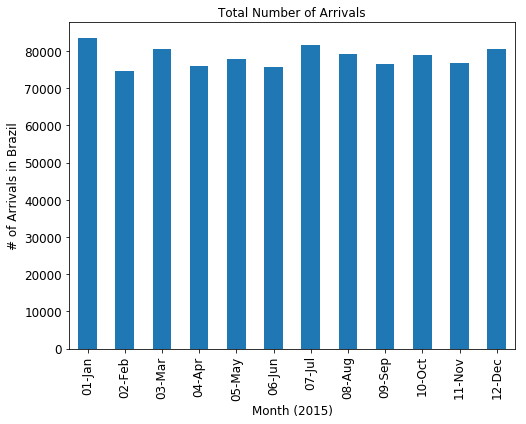

In [70]:
ax = monthgroup.sum().plot(kind='bar', title ="Total Number of Arrivals", figsize=(8, 6), legend=False, fontsize=12)
ax.set_xlabel('Month (2015)', fontsize=12)
ax.set_ylabel("# of Arrivals in Brazil", fontsize=12)
plt.show()

Based on this data it appears that January is the busiest month in the year which was different from my observations in the first graph. February appears to have the lowest number of arrivals. 

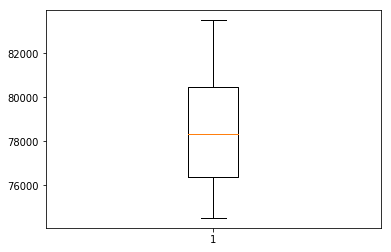

In [72]:
plt.boxplot(monthgroup.sum())
plt.show()

A boxplot of the total number of arrivals per month shows that the median is somewhere around 78,500. There do not appear to be extreme outliers. The minimum value is around 74,000 and the maximum value is around 84,000.